In [1]:
#Import necessary modules and load the data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('../data/ncr_ride_bookings.csv')
df.head()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI


In [2]:
#Understand the data
df.shape

(150000, 21)

In [3]:
#Check datatypes and counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date                               150000 non-null  object 
 1   Time                               150000 non-null  object 
 2   Booking ID                         150000 non-null  object 
 3   Booking Status                     150000 non-null  object 
 4   Customer ID                        150000 non-null  object 
 5   Vehicle Type                       150000 non-null  object 
 6   Pickup Location                    150000 non-null  object 
 7   Drop Location                      150000 non-null  object 
 8   Avg VTAT                           139500 non-null  float64
 9   Avg CTAT                           102000 non-null  float64
 10  Cancelled Rides by Customer        10500 non-null   float64
 11  Reason for cancelling by Customer  1050

In [4]:
#Get statistics of the numeric columns
df.describe()

,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Cancelled Rides by Driver,Incomplete Rides,Booking Value,Ride Distance,Driver Ratings,Customer Rating
count,139500.000000,102000.000000,10500.0,27000.0,9000.0,102000.000000,102000.000000,93000.000000,93000.000000
mean,8.456352,29.149636,1.0,1.0,1.0,508.295912,24.637012,4.230992,4.404584
std,3.773564,8.902577,0.0,0.0,0.0,395.805774,14.002138,0.436871,0.437819
min,2.000000,10.000000,1.0,1.0,1.0,50.000000,1.000000,3.000000,3.000000
25%,5.300000,21.600000,1.0,1.0,1.0,234.000000,12.460000,4.100000,4.200000
50%,8.300000,28.800000,1.0,1.0,1.0,414.000000,23.720000,4.300000,4.500000
75%,11.300000,36.800000,1.0,1.0,1.0,689.000000,36.820000,4.600000,4.800000
max,20.000000,45.000000,1.0,1.0,1.0,4277.000000,50.000000,5.000000,5.000000


In [5]:
#Check null values
df.isna().sum()

Date                                      0
Time                                      0
Booking ID                                0
Booking Status                            0
Customer ID                               0
Vehicle Type                              0
Pickup Location                           0
Drop Location                             0
Avg VTAT                              10500
Avg CTAT                              48000
Cancelled Rides by Customer          139500
Reason for cancelling by Customer    139500
Cancelled Rides by Driver            123000
Driver Cancellation Reason           123000
Incomplete Rides                     141000
Incomplete Rides Reason              141000
Booking Value                         48000
Ride Distance                         48000
Driver Ratings                        57000
Customer Rating                       57000
Payment Method                        48000
dtype: int64

In [6]:
#Check for duplicated entries
df.duplicated().sum()

np.int64(0)

In [7]:
#Get all unique values of Booking Status column
df['Booking Status'].unique()

array(['No Driver Found', 'Incomplete', 'Completed',
       'Cancelled by Driver', 'Cancelled by Customer'], dtype=object)

In [8]:
#Get all unique values of Vehicle Type column
df['Vehicle Type'].unique()

array(['eBike', 'Go Sedan', 'Auto', 'Premier Sedan', 'Bike', 'Go Mini',
       'Uber XL'], dtype=object)

In [9]:
#Get all unique values of Payment Method column
df['Payment Method'].unique()

array([nan, 'UPI', 'Debit Card', 'Cash', 'Uber Wallet', 'Credit Card'],
      dtype=object)

In [10]:
#Create a copy of the data
df_clean = df.copy()

In [11]:
#Combine datetime
df_clean['Pickup Datetime'] = pd.to_datetime(df_clean['Date'] + ' ' + df_clean['Time'])
#Extract Month, Hour and Day from Datetime column
df_clean['Month'] = df_clean['Pickup Datetime'].dt.month
df_clean['Hour'] = df_clean['Pickup Datetime'].dt.hour
df_clean['Day'] = df_clean['Pickup Datetime'].dt.day_name()
df_clean = df_clean.sort_values(by='Pickup Datetime')
#Drop date and time columns
df_clean.drop(['Date', 'Time'], axis=1, inplace=True)
df_clean = df_clean.reset_index(drop= True)
#Rename the columns
df_clean.rename(columns={'Cancelled Rides by Customer':'Customer Cancellation', 
                         'Reason for cancelling by Customer':'Customer Cancellation Reason',
                         'Cancelled Rides by Driver':'Driver Cancellation',}, inplace=True)
df_clean.head()

,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,Customer Cancellation,Customer Cancellation Reason,...,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method,Pickup Datetime,Month,Hour,Day
0,"""CNR4352144""",Completed,"""CID8362794""",Bike,Udyog Vihar,Ambience Mall,10.8,38.9,NaN,NaN,...,NaN,99.0,37.98,4.8,4.8,Cash,2024-01-01 00:19:34,1,0,Monday
1,"""CNR9147645""",Completed,"""CID8300238""",Go Mini,Basai Dhankot,Madipur,8.5,15.1,NaN,NaN,...,NaN,114.0,39.29,4.2,4.1,Uber Wallet,2024-01-01 01:35:18,1,1,Monday
2,"""CNR1009222""",Cancelled by Driver,"""CID2030746""",Go Sedan,Tughlakabad,Greater Kailash,7.4,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2024-01-01 01:37:50,1,1,Monday
3,"""CNR2740479""",Cancelled by Driver,"""CID3231181""",Auto,Palam Vihar,Kherki Daula Toll,5.6,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2024-01-01 01:48:03,1,1,Monday
4,"""CNR7650148""",Cancelled by Driver,"""CID3381661""",Go Sedan,Narsinghpur,Pulbangash,6.2,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2024-01-01 01:49:56,1,1,Monday


In [12]:
#Missing Value percentages
(df_clean.isna().sum()/len(df_clean)) * 100

Booking ID                       0.0
Booking Status                   0.0
Customer ID                      0.0
Vehicle Type                     0.0
Pickup Location                  0.0
Drop Location                    0.0
Avg VTAT                         7.0
Avg CTAT                        32.0
Customer Cancellation           93.0
Customer Cancellation Reason    93.0
Driver Cancellation             82.0
Driver Cancellation Reason      82.0
Incomplete Rides                94.0
Incomplete Rides Reason         94.0
Booking Value                   32.0
Ride Distance                   32.0
Driver Ratings                  38.0
Customer Rating                 38.0
Payment Method                  32.0
Pickup Datetime                  0.0
Month                            0.0
Hour                             0.0
Day                              0.0
dtype: float64

In [13]:
#Replace missing values
df_clean.fillna({'Payment Method':'Unknown'},inplace=True)

In [14]:
#Standardize the values in the columns
df_clean['Vehicle Type'] = df_clean['Vehicle Type'].str.strip().str.title()
df_clean['Booking Status'] = df_clean['Booking Status'].str.strip().str.title()
df_clean['Payment Method'] = df_clean['Payment Method'].str.strip().str.title()

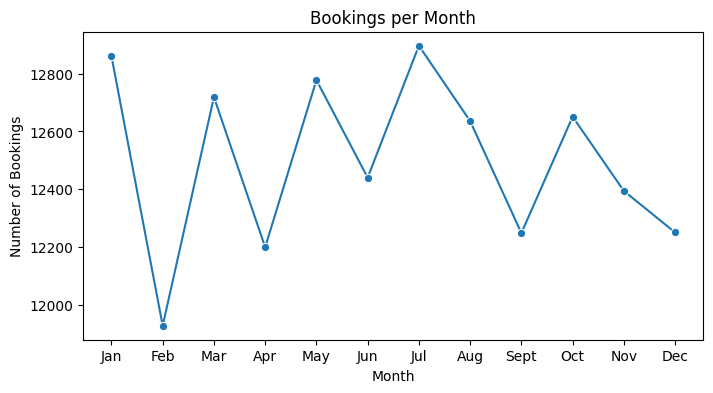

In [15]:
bookings_per_month = df_clean.groupby('Month')['Booking ID'].count().reset_index()
plt.figure(figsize=(8,4))
sns.lineplot(data=bookings_per_month,x='Month',y='Booking ID',marker='o')
plt.title('Bookings per Month')
plt.ylabel('Number of Bookings')
plt.xticks(ticks=range(1,13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'])
plt.show()

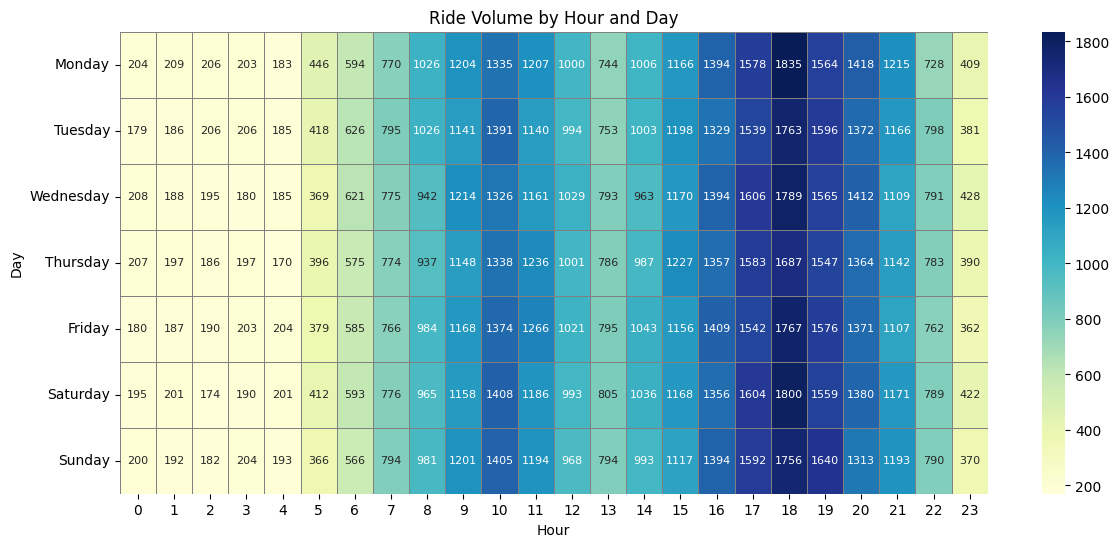

In [19]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
pivot_table = df_clean.pivot_table(index='Day',columns='Hour',values='Booking ID', aggfunc='count')
pivot_table = pivot_table.reindex(day_order)
plt.figure(figsize=(14,6))
sns.heatmap(pivot_table, cmap="YlGnBu", annot=True, fmt='.0f', linewidths=0.5, linecolor="gray", annot_kws={"size": 8})
plt.title('Ride Volume by Hour and Day')
plt.show()

From the heatmap, we observe that ride bookings peak between 17:00 and 19:00, particularly on weekdays.
This time window aligns with post-office hours when most people commute back home.
Understanding this demand pattern allows Uber to optimize driver allocation, pricing strategies, and customer experience. \
**Recommendation**:\
Increase driver availability in office-dense areas (e.g., IT parks, business districts) during peak hours.\

**Expected Impact**:
- Reduced customer wait times.
- Improved driver earnings due to more rides in shorter time.

**Recommendation**:
- Introduce “Office Hour Quick Ride” discounts or subscription plans for frequent riders.

- Enable priority matching for repeat customers who book daily rides at fixed times.

- Suggest pool rides proactively to customers traveling along similar office-home corridors.

**Expected Impact**:
- Increased customer retention.
- Improved overall customer satisfaction.

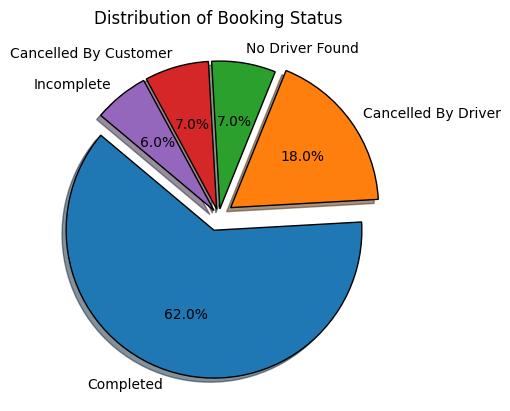

In [20]:
booking_counts = df_clean['Booking Status'].value_counts()
total_booking = booking_counts.sum()
labels = booking_counts.index
explode = [0.1 if (x/total_booking) >= 0.15 else 0.05 for x in booking_counts.values]
plt.pie(booking_counts,labels=labels,autopct='%.1f%%',explode=explode,startangle=140,shadow=True, wedgeprops={'edgecolor': 'black'})
plt.title('Distribution of Booking Status')
plt.show()

From the pie chart, we observe that only 65% of bookings are successfully completed, while 18% of bookings are cancelled by drivers.
This is a significant cancellation rate and requires deeper investigation because high driver cancellations negatively impact customer satisfaction, platform reliability, and revenue.

In [21]:
cancellations = (df_clean['Driver Cancellation'] == 1).sum()
print(cancellations)

27000


In [22]:
driver_reasons = df_clean['Driver Cancellation Reason'].value_counts()
print(driver_reasons)

Driver Cancellation Reason
Customer related issue                 6837
The customer was coughing/sick         6751
Personal & Car related issues          6726
More than permitted people in there    6686
Name: count, dtype: int64


In [23]:
cust_reasons = df_clean['Customer Cancellation Reason'].value_counts()
print(cust_reasons)

Customer Cancellation Reason
Wrong Address                                   2362
Change of plans                                 2353
Driver is not moving towards pickup location    2335
Driver asked to cancel                          2295
AC is not working                               1155
Name: count, dtype: int64


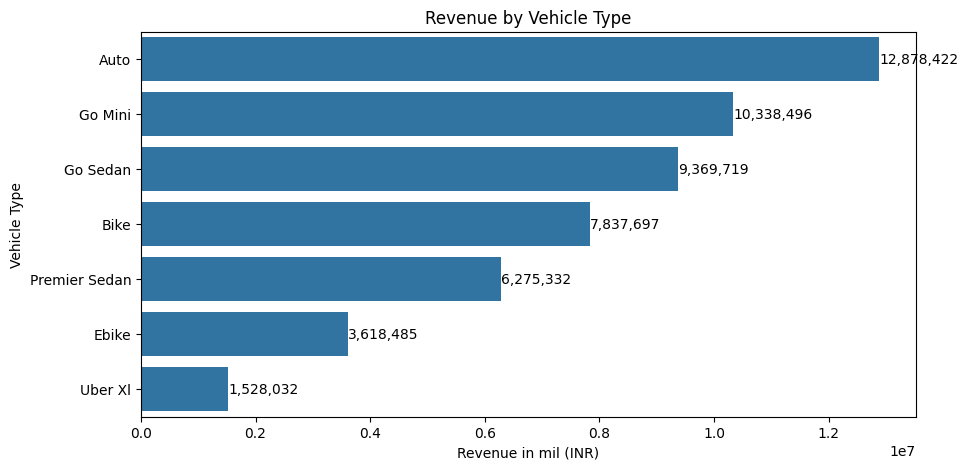

In [25]:
#Plotting revenue by vehicle type
rev_by_vehicle = df_clean.groupby("Vehicle Type")["Booking Value"].sum().sort_values(ascending=False)
plt.figure(figsize=(10,5))
fig = sns.barplot(y=rev_by_vehicle.index, x=rev_by_vehicle.values)
#Annotate each bar with its value
for p in fig.patches:
    fig.annotate(f"{p.get_width():,.0f}",   # Format with commas
                (p.get_width(), p.get_y() + p.get_height()/2),
                ha='left', va='center', fontsize=10)
plt.xlabel("Revenue in mil (INR)")
plt.title("Revenue by Vehicle Type")
plt.show()

In [26]:
#Identifying top customers
top_customers = df_clean.groupby('Customer ID').agg(Total_Bookings = ('Booking ID','count'), total_revenue = ('Booking Value', 'sum')).reset_index()
top_customers = top_customers.sort_values(by='total_revenue', ascending=False)
top_customers = top_customers.reset_index(drop=True)
print(top_customers.head())

    Customer ID  Total_Bookings  total_revenue
0  "CID2674107"               2         4987.0
1  "CID7828101"               3         4722.0
2  "CID2706299"               1         4277.0
3  "CID4843078"               1         4228.0
4  "CID2978596"               1         4220.0


In [59]:
#df_clean.to_csv("../data/uber_cleaned_data.csv", index=False)